In [57]:
import xlsxwriter
import os
import nltk
import pickle
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

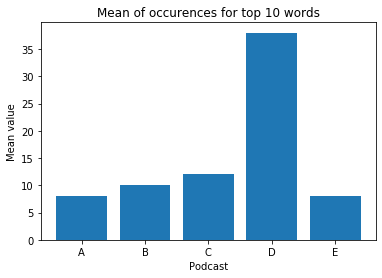

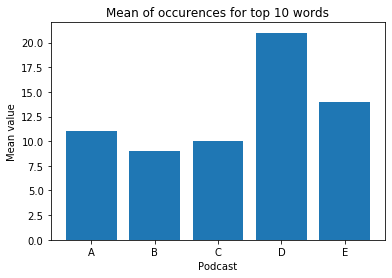

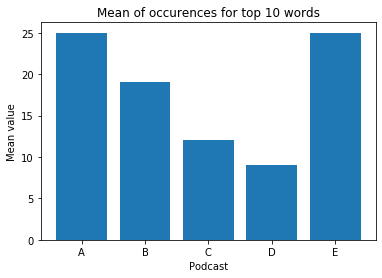

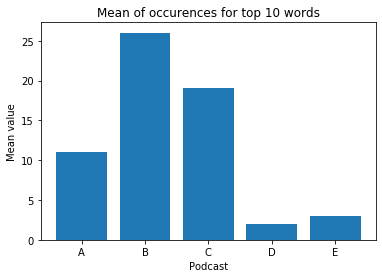

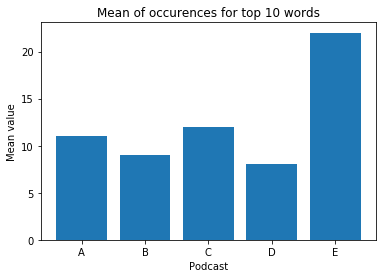

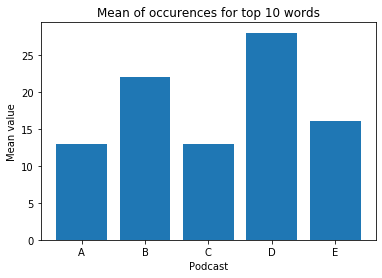

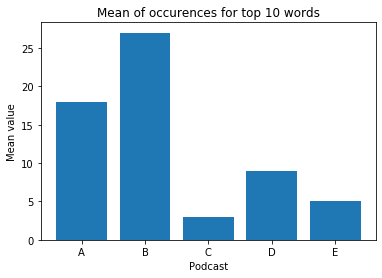

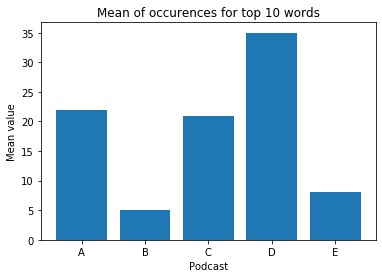

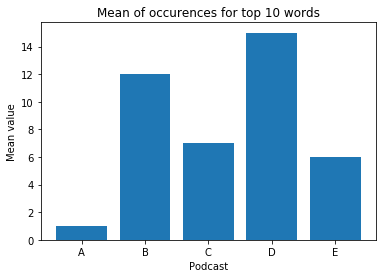

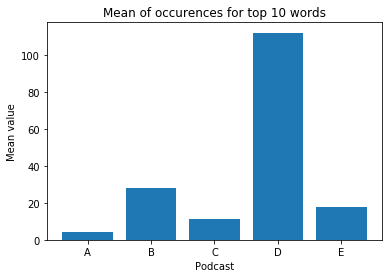

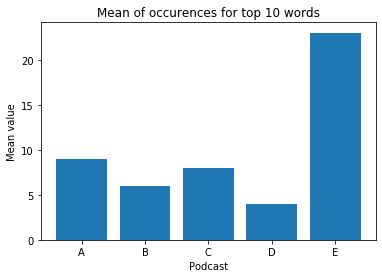

ValueError: not enough values to unpack (expected at least 4, got 3)

In [97]:
def iterator(index):
    
    labels = ['ID','Name','Date','topicName','scrubbedtext']
    podKnow_Data = pd.DataFrame.from_records(results, columns = labels)
    
    #isolate scrubbed text values and convert to lowercase to avoid duplicates
    scrubbedData = str(podKnow_Data.iloc[index-1:index, 4].values).lower()
    
    #remove junk values
    scrubbedData = scrubbedData.replace("\"", "").replace(",", "").replace("\'",  "")
    
    tokens = nltk.wordpunct_tokenize(scrubbedData)
            
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    #this block removes junk characters and only accepts words 3 letters or longer
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_word_filter(lambda w: len(w) < 3)
    
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    
    scored = sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))
    totalLength = 0
    
    for x in range(0, 10):
        occurences = re.findall("\d+", str(scored[0]))[0]
        totalLength = totalLength + int(occurences)
        
    #returns mean of occurences for top 10 bigrams for a given podcast
    
    return totalLength / 10 


results = []
counter = 0
totalList = []
graphCounter = 0 

saveLocation = r'C:\Users\Jeremy\Desktop\scrubbed transcripts\gcsst\scrubbed'
for folderName,subfolders,fileName in os.walk(r'C:\Users\Jeremy\Desktop\scrubbed transcripts\gcsst\scrubbed'):
    
  #  try:
        for file in fileName:
            if str(file.endswith(".txt_scrubbed")):
                f = open(os.path.join(folderName,file),'rb')
                data = pickle.load(f)
            
                value0, value1, value2,value3, *extraWords = file.split('_')
                value4 = data
                rows = (value0,value1,value2,value3, value4)
                results.append(rows)
            
                counter = counter + 1
                graphCounter = graphCounter + 1
                
                
             
                #gets mean occurences of bigrams for each podcast
                mean = iterator(counter)
                                    
                #continually add the total contents of every podcast together
                totalList.append(mean)
            

            if(graphCounter % 5 == 0):
        
                plt.xlabel('Podcast')
                plt.title('Mean of occurences for top 10 bigrams')
                plt.ylabel('Mean value')
                
                height = totalList
                bars = ('A', 'B', 'C', 'D', 'E')
                totalList = []
                
                y_pos = np.arange(len(bars))
 
                plt.bar(y_pos, height)
                plt.xticks(y_pos, bars)
            
                pngFileName = file.replace(".txt_scrubbed", ".png")
                plt.savefig(pngFileName)
                
                plt.show()
            
                plt.clf()
                plt.cla()
                plt.close()
                
    #except:
     #   print("error")
